In [234]:
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestRegressor
import os
from sklearn import svm
from sklearn import datasets
from sklearn.svm import SVR 

In [235]:
df1 = pd.read_excel(r"C:\Users\pauli\Downloads\b2c_gv_vartojimas.xlsx")
df_o1 = pd.read_csv(r"C:\Users\pauli\Downloads\orai_801_1030.csv")

In [236]:
df_o1['cloud_cover'] = df_o1['cloud_cover'].fillna(100.0)
df_o1['condition_code_1'] = LabelEncoder().fit_transform(df_o1['condition_code'])
condition_code = dict(zip(df_o1['condition_code'], df_o1['condition_code_1']))
print(condition_code)

{'partly-cloudy': 10, 'variable-cloudiness': 17, 'cloudy': 1, 'clear': 0, 'cloudy-with-sunny-intervals': 2, 'light-rain': 6, 'rain': 11, 'heavy-rain': 5, 'thunderstorms': 16, 'light-rain-at-times': 7, 'thunder': 15, 'mist': 9, 'rain-at-times': 12, 'rain-showers': 13, 'fog': 3, 'hail': 4, 'light-sleet': 8, 'sleet': 14}


In [237]:
df_o1['obs_time_utc'] = pd.to_datetime(df_o1['obs_time_utc'])
df_o1.rename(columns={'obs_time_utc': 'dateTime'}, inplace=True)
df_o1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2184 entries, 0 to 2183
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   dateTime                2184 non-null   datetime64[ns]
 1   air_temperature         2184 non-null   float64       
 2   feels_like_temperature  2184 non-null   float64       
 3   wind_speed              2184 non-null   float64       
 4   wind_gust               2184 non-null   float64       
 5   wind_direction          2184 non-null   int64         
 6   cloud_cover             2184 non-null   float64       
 7   sea_level_pressure      2184 non-null   float64       
 8   relative_humidity       2184 non-null   int64         
 9   precipitation           2184 non-null   float64       
 10  condition_code          2184 non-null   object        
 11  condition_code_1        2184 non-null   int64         
dtypes: datetime64[ns](1), float64(7), int64(3), obje

In [238]:
df1['viso'] = df1.iloc[:, 1:].sum(axis=1)
df1=df1[['dateTime', 'viso']].copy()
df1['valanda']=df1['dateTime'].dt.hour
df1['diena']=df1['dateTime'].dt.day
df1['menuo']=df1['dateTime'].dt.month
df1['sav_diena']=df1['dateTime'].dt.weekday

In [239]:
df1 = pd.merge(df1, df_o1, on='dateTime', how='left')
df1.drop('condition_code', axis=1, inplace=True)

In [240]:
df1_1031=df1[-25:-1].copy()
df1=df1[:-25]

In [241]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   dateTime                2160 non-null   datetime64[ns]
 1   viso                    2160 non-null   float64       
 2   valanda                 2160 non-null   int32         
 3   diena                   2160 non-null   int32         
 4   menuo                   2160 non-null   int32         
 5   sav_diena               2160 non-null   int32         
 6   air_temperature         2160 non-null   float64       
 7   feels_like_temperature  2160 non-null   float64       
 8   wind_speed              2160 non-null   float64       
 9   wind_gust               2160 non-null   float64       
 10  wind_direction          2160 non-null   float64       
 11  cloud_cover             2160 non-null   float64       
 12  sea_level_pressure      2160 non-null   float64 

<Axes: >

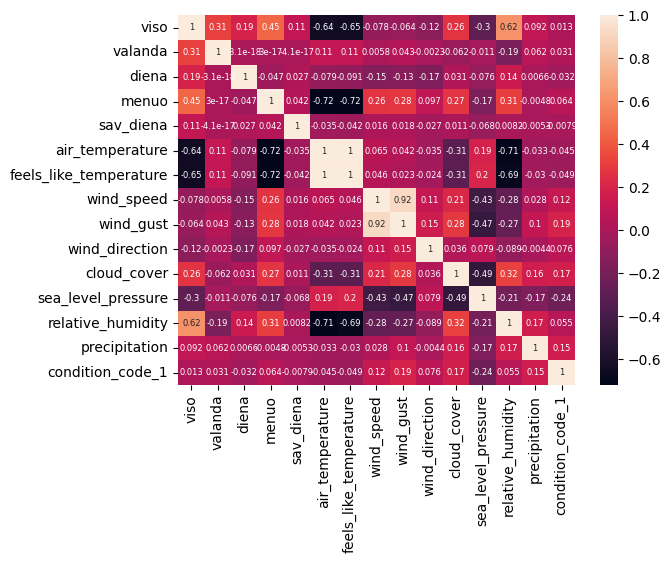

In [242]:
dt=df1.corr(numeric_only=True)
sns.heatmap(data=dt,annot=True, annot_kws={'fontsize':6})

In [243]:
Xmok= df1.drop(columns=['dateTime', 'viso'])
y=df1['viso']
xpred = df1_1031.drop(columns=['dateTime', 'viso'])
X_train, X_test, y_train, y_test = train_test_split(Xmok, y, test_size=0.1, random_state=30)

fit = LinearRegression().fit(X_train, y_train)
pred = fit.predict(X_test)
fit.score(X_test, y_test)*100.0
pred = fit.predict(xpred)
df1_1031['Linear'] = pred


In [244]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
# Make predictions
y_pred = rf.predict(X_test)
# Evaluate accuracy
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f'Mean Absolute Percentage Error: {mape}%')
pred = rf.predict(xpred)
df1_1031['RandomForest']=pred

Mean Absolute Percentage Error: 8.714940252572196%


In [245]:
dt_regressor = DecisionTreeRegressor(random_state=35)
dt_regressor.fit(X_train, y_train)
y_pred = dt_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
# print(f"R-squared: {r2}")
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f'Mean Absolute Percentage Error: {mape}%')
pred = dt_regressor.predict(xpred)
df1_1031['DecisionTree']= pred

Mean Squared Error: 9314.592070140568
Mean Absolute Percentage Error: 12.78443435636907%


In [246]:
svr = SVR(kernel='linear')  
svr.fit(X_train, y_train)  
pred = svr.predict(xpred)
df1_1031['SVRlinear']= pred

In [247]:
svr = SVR(kernel='poly')  
svr.fit(X_train, y_train)  
pred = svr.predict(xpred)
df1_1031['SVRpoly']= pred

In [248]:
svr = SVR(kernel='rbf')  
svr.fit(X_train, y_train)  
pred = svr.predict(xpred)
df1_1031['SVRrbf']= pred

In [249]:
df11=df1_1031

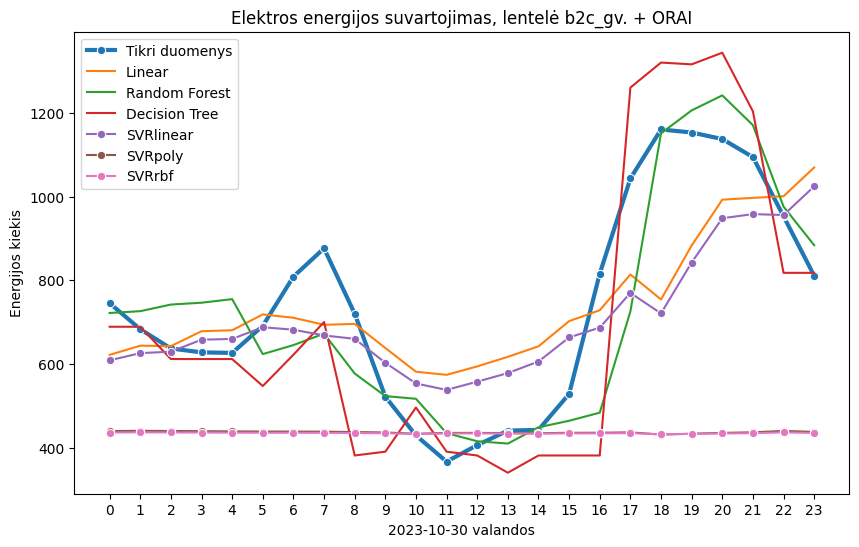

In [250]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=df1_1031, x='valanda', y='viso', label='Tikri duomenys', marker='o', linewidth=3)
sns.lineplot(data=df1_1031, x='valanda', y='Linear', label='Linear')
sns.lineplot(data=df1_1031, x='valanda', y='RandomForest', label='Random Forest')
sns.lineplot(data=df1_1031, x='valanda', y='DecisionTree', label='Decision Tree')
sns.lineplot(data=df1_1031, x='valanda', y='SVRlinear', label='SVRlinear', marker='o')
sns.lineplot(data=df1_1031, x='valanda', y='SVRpoly', label='SVRpoly', marker='o')
sns.lineplot(data=df1_1031, x='valanda', y='SVRrbf', label='SVRrbf', marker='o')
plt.title('Elektros energijos suvartojimas, lentelė b2c_gv. + ORAI')
plt.ylabel('Energijos kiekis')
plt.xlabel('2023-10-30 valandos')
plt.xticks(ticks=df1_1031['valanda'], labels=df1_1031['valanda'])
# plt.xticks(rotation=0)
plt.show()

In [251]:
df1_1031.head(1)

,dateTime,viso,valanda,diena,menuo,sav_diena,air_temperature,feels_like_temperature,wind_speed,wind_gust,...,sea_level_pressure,relative_humidity,precipitation,condition_code_1,Linear,RandomForest,DecisionTree,SVRlinear,SVRpoly,SVRrbf
2160,2023-10-30,745.340335,0,30,10,0,7.0,7.0,3.6,6.0,...,1004.6,99.0,0.0,11.0,621.890416,721.949439,689.086368,608.905498,439.88906,436.527524


In [252]:
df1 = pd.read_excel(r"C:\Users\pauli\Downloads\b2c_ngv_vartojimas.xlsx")
df_o1 = pd.read_csv(r"C:\Users\pauli\Downloads\orai_801_1030.csv")

In [253]:
df_o1['cloud_cover'] = df_o1['cloud_cover'].fillna(100.0)
df_o1['condition_code_1'] = LabelEncoder().fit_transform(df_o1['condition_code'])
condition_code = dict(zip(df_o1['condition_code'], df_o1['condition_code_1']))
print(condition_code)

{'partly-cloudy': 10, 'variable-cloudiness': 17, 'cloudy': 1, 'clear': 0, 'cloudy-with-sunny-intervals': 2, 'light-rain': 6, 'rain': 11, 'heavy-rain': 5, 'thunderstorms': 16, 'light-rain-at-times': 7, 'thunder': 15, 'mist': 9, 'rain-at-times': 12, 'rain-showers': 13, 'fog': 3, 'hail': 4, 'light-sleet': 8, 'sleet': 14}


In [254]:
df_o1['obs_time_utc'] = pd.to_datetime(df_o1['obs_time_utc'])
df_o1.rename(columns={'obs_time_utc': 'dateTime'}, inplace=True)
df_o1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2184 entries, 0 to 2183
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   dateTime                2184 non-null   datetime64[ns]
 1   air_temperature         2184 non-null   float64       
 2   feels_like_temperature  2184 non-null   float64       
 3   wind_speed              2184 non-null   float64       
 4   wind_gust               2184 non-null   float64       
 5   wind_direction          2184 non-null   int64         
 6   cloud_cover             2184 non-null   float64       
 7   sea_level_pressure      2184 non-null   float64       
 8   relative_humidity       2184 non-null   int64         
 9   precipitation           2184 non-null   float64       
 10  condition_code          2184 non-null   object        
 11  condition_code_1        2184 non-null   int64         
dtypes: datetime64[ns](1), float64(7), int64(3), obje

In [255]:
df1['viso'] = df1.iloc[:, 1:].sum(axis=1)
df1=df1[['dateTime', 'viso']].copy()
df1['valanda']=df1['dateTime'].dt.hour
df1['diena']=df1['dateTime'].dt.day
df1['menuo']=df1['dateTime'].dt.month
df1['sav_diena']=df1['dateTime'].dt.weekday

In [256]:
df1 = pd.merge(df1, df_o1, on='dateTime', how='left')
df1.drop('condition_code', axis=1, inplace=True)

In [257]:
df1_1031=df1[-25:-1].copy()
df1=df1[:-25]

<Axes: >

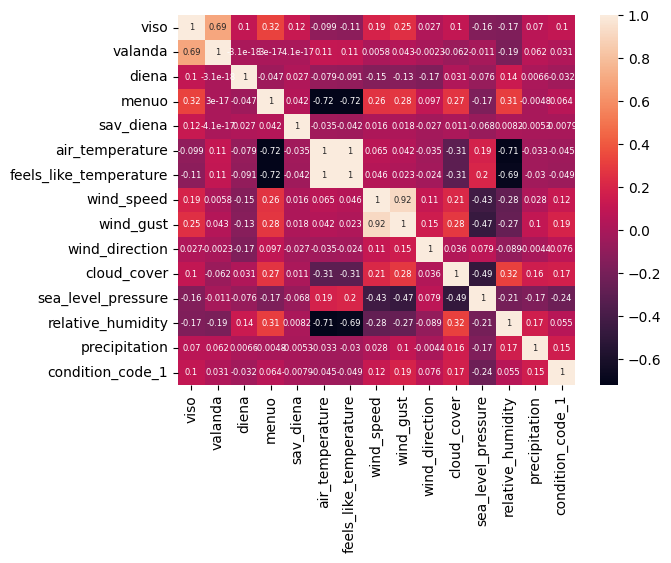

In [258]:
dt=df1.corr(numeric_only=True)
sns.heatmap(data=dt,annot=True, annot_kws={'fontsize':6})

In [259]:
Xmok= df1.drop(columns=['dateTime', 'viso'])
y=df1['viso']
xpred = df1_1031.drop(columns=['dateTime', 'viso'])
X_train, X_test, y_train, y_test = train_test_split(Xmok, y, test_size=0.1, random_state=30)

fit = LinearRegression().fit(X_train, y_train)
pred = fit.predict(X_test)
fit.score(X_test, y_test)*100.0
pred = fit.predict(xpred)
df1_1031['Linear'] = pred

In [260]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
# Make predictions
y_pred = rf.predict(X_test)
# Evaluate accuracy
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f'Mean Absolute Percentage Error: {mape}%')
pred = rf.predict(xpred)
df1_1031['RandomForest']=pred

Mean Absolute Percentage Error: 3.6771885044172556%


In [261]:
dt_regressor = DecisionTreeRegressor(random_state=35)
dt_regressor.fit(X_train, y_train)
y_pred = dt_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
# print(f"R-squared: {r2}")
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f'Mean Absolute Percentage Error: {mape}%')
pred = dt_regressor.predict(xpred)
df1_1031['DecisionTree']= pred

Mean Squared Error: 148.4478476610936
Mean Absolute Percentage Error: 4.655013576360377%


In [262]:
svr = SVR(kernel='linear')  
svr.fit(X_train, y_train)  
pred = svr.predict(xpred)
df1_1031['SVRlinear']= pred

In [263]:
svr = SVR(kernel='poly')  
svr.fit(X_train, y_train)  
pred = svr.predict(xpred)
df1_1031['SVRpoly']= pred

In [264]:
svr = SVR(kernel='rbf')  
svr.fit(X_train, y_train)  
pred = svr.predict(xpred)
df1_1031['SVRrbf']= pred

In [265]:
df12=df1_1031

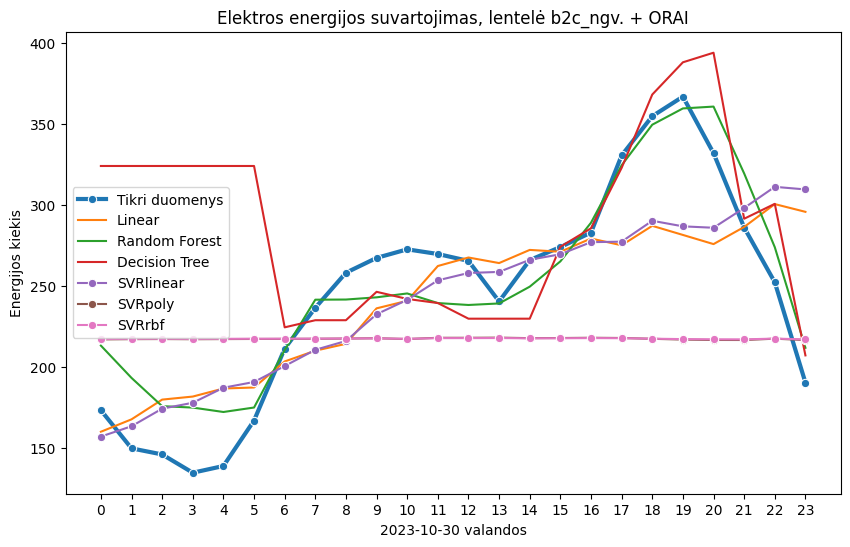

In [266]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=df1_1031, x='valanda', y='viso', label='Tikri duomenys', marker='o', linewidth=3)
sns.lineplot(data=df1_1031, x='valanda', y='Linear', label='Linear')
sns.lineplot(data=df1_1031, x='valanda', y='RandomForest', label='Random Forest')
sns.lineplot(data=df1_1031, x='valanda', y='DecisionTree', label='Decision Tree')
sns.lineplot(data=df1_1031, x='valanda', y='SVRlinear', label='SVRlinear', marker='o')
sns.lineplot(data=df1_1031, x='valanda', y='SVRpoly', label='SVRpoly', marker='o')
sns.lineplot(data=df1_1031, x='valanda', y='SVRrbf', label='SVRrbf', marker='o')
plt.title('Elektros energijos suvartojimas, lentelė b2c_ngv. + ORAI')
plt.ylabel('Energijos kiekis')
plt.xlabel('2023-10-30 valandos')
plt.xticks(ticks=df1_1031['valanda'], labels=df1_1031['valanda'])
# plt.xticks(rotation=0)
plt.show()

In [267]:
df1_1031.head(1)

,dateTime,viso,valanda,diena,menuo,sav_diena,air_temperature,feels_like_temperature,wind_speed,wind_gust,...,sea_level_pressure,relative_humidity,precipitation,condition_code_1,Linear,RandomForest,DecisionTree,SVRlinear,SVRpoly,SVRrbf
2160,2023-10-30,173.130666,0,30,10,0,7.0,7.0,3.6,6.0,...,1004.6,99.0,0.0,11.0,159.834162,213.023091,323.889001,156.865841,216.837395,217.107212


In [268]:
df1 = pd.read_excel(r"C:\Users\pauli\Downloads\b2b_gv_vartojimas.xlsx")
df_o1 = pd.read_csv(r"C:\Users\pauli\Downloads\orai_1101-1030.csv")

In [269]:
df1.head(1)

,data_valanda,0,1,2,3,4,5,6,7,8,...,753,754,755,756,757,758,759,760,761,762
0,2022-11-01,0.0,0.0,4.68,0.001,0.0,0.0,1.7159,1.9334,1.4671,...,5.0,0.4199,23.4,0.0,0.0,5.9883,91.9,0.3135,6.9318,2.831


In [270]:
df_o1['cloud_cover'] = df_o1['cloud_cover'].fillna(100.0)
df_o1['condition_code_1'] = LabelEncoder().fit_transform(df_o1['condition_code'])
condition_code = dict(zip(df_o1['condition_code'], df_o1['condition_code_1']))
print(condition_code)

{'cloudy': 1, 'cloudy-with-sunny-intervals': 2, 'mist': 13, 'fog': 3, 'light-rain': 8, 'rain': 15, 'partly-cloudy': 14, 'variable-cloudiness': 25, 'clear': 0, 'snow': 20, 'light-snow': 11, 'snow-showers': 22, 'light-sleet': 10, 'freezing-rain': 4, 'heavy-snow': 7, 'sleet': 18, 'snow-at-times': 21, 'sleet-showers': 19, 'light-snow-at-times': 12, 'heavy-rain': 6, 'rain-at-times': 16, 'thunderstorms': 24, 'rain-showers': 17, 'light-rain-at-times': 9, 'thunder': 23, 'hail': 5}


In [271]:
df_o1['obs_time_utc'] = pd.to_datetime(df_o1['obs_time_utc'])
df_o1.rename(columns={'obs_time_utc': 'dateTime'}, inplace=True)
df1.rename(columns={'data_valanda': 'dateTime'}, inplace=True)
df_o1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8736 entries, 0 to 8735
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   dateTime                8736 non-null   datetime64[ns]
 1   air_temperature         8736 non-null   float64       
 2   feels_like_temperature  8736 non-null   float64       
 3   wind_speed              8736 non-null   float64       
 4   wind_gust               8736 non-null   float64       
 5   wind_direction          8736 non-null   int64         
 6   cloud_cover             8736 non-null   float64       
 7   sea_level_pressure      8736 non-null   float64       
 8   relative_humidity       8736 non-null   int64         
 9   precipitation           8736 non-null   float64       
 10  condition_code          8736 non-null   object        
 11  condition_code_1        8736 non-null   int64         
dtypes: datetime64[ns](1), float64(7), int64(3), obje

In [272]:
df1['viso'] = df1.iloc[:, 1:].sum(axis=1)
df1=df1[['dateTime', 'viso']].copy()
df1['valanda']=df1['dateTime'].dt.hour
df1['diena']=df1['dateTime'].dt.day
df1['menuo']=df1['dateTime'].dt.month
df1['sav_diena']=df1['dateTime'].dt.weekday

In [273]:
df1 = pd.merge(df1, df_o1, on='dateTime', how='left')
df1.drop('condition_code', axis=1, inplace=True)

In [274]:
df1_1031=df1[-49:-25].copy()
df1=df1[:-49]


<Axes: >

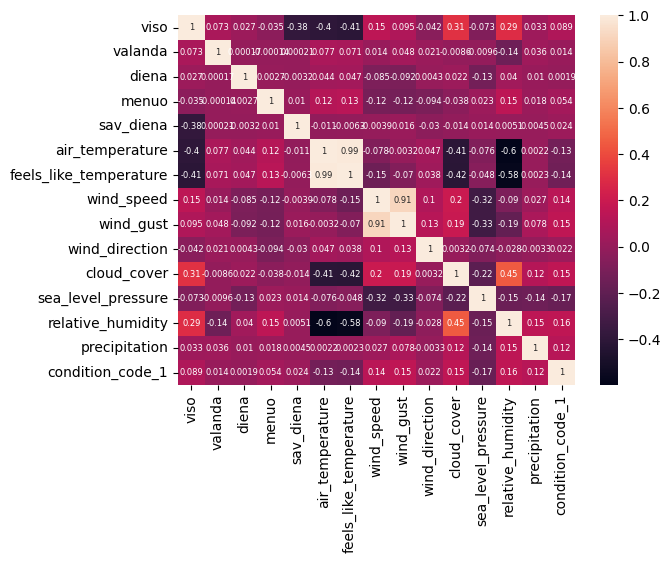

In [275]:
dt=df1.corr(numeric_only=True)
sns.heatmap(data=dt,annot=True, annot_kws={'fontsize':6})

In [276]:
Xmok= df1.drop(columns=['dateTime', 'viso'])
y=df1['viso']
xpred = df1_1031.drop(columns=['dateTime', 'viso'])
X_train, X_test, y_train, y_test = train_test_split(Xmok, y, test_size=0.1, random_state=30)

fit = LinearRegression().fit(X_train, y_train)
pred = fit.predict(X_test)
fit.score(X_test, y_test)*100.0
pred = fit.predict(xpred)
df1_1031['Linear'] = pred

In [277]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
# Make predictions
y_pred = rf.predict(X_test)
# Evaluate accuracy
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f'Mean Absolute Percentage Error: {mape}%')
pred = rf.predict(xpred)
df1_1031['RandomForest']=pred

Mean Absolute Percentage Error: 5.566048335624213%


In [278]:
dt_regressor = DecisionTreeRegressor(random_state=35)
dt_regressor.fit(X_train, y_train)
y_pred = dt_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
# print(f"R-squared: {r2}")
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f'Mean Absolute Percentage Error: {mape}%')
pred = dt_regressor.predict(xpred)
df1_1031['DecisionTree']= pred

Mean Squared Error: 1076143.1451874601
Mean Absolute Percentage Error: 6.993359294698759%


In [279]:
svr = SVR(kernel='linear')  
svr.fit(X_train, y_train)  
pred = svr.predict(xpred)
df1_1031['SVRlinear']= pred

In [280]:
svr = SVR(kernel='poly')  
svr.fit(X_train, y_train)  
pred = svr.predict(xpred)
df1_1031['SVRpoly']= pred

In [281]:
svr = SVR(kernel='rbf')  
svr.fit(X_train, y_train)  
pred = svr.predict(xpred)
df1_1031['SVRrbf']= pred

In [282]:
df13=df1_1031

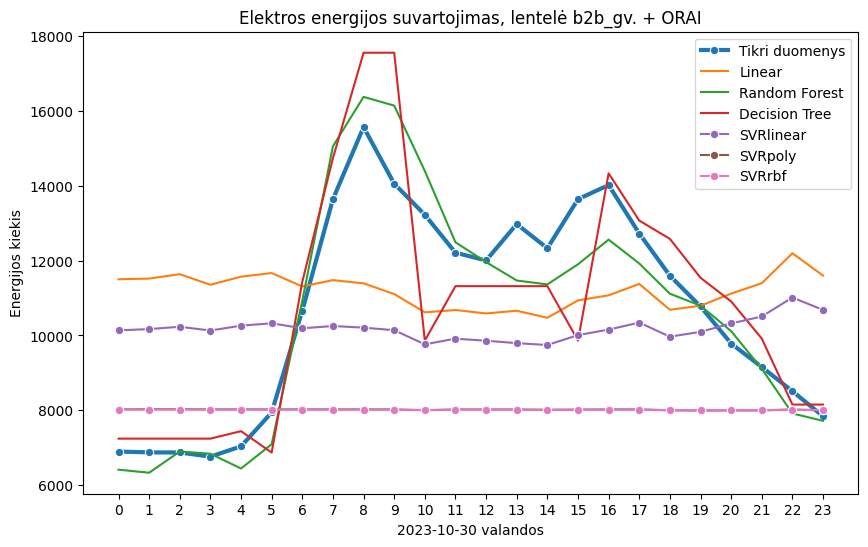

In [283]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=df1_1031, x='valanda', y='viso', label='Tikri duomenys', marker='o', linewidth=3)
sns.lineplot(data=df1_1031, x='valanda', y='Linear', label='Linear')
sns.lineplot(data=df1_1031, x='valanda', y='RandomForest', label='Random Forest')
sns.lineplot(data=df1_1031, x='valanda', y='DecisionTree', label='Decision Tree')
sns.lineplot(data=df1_1031, x='valanda', y='SVRlinear', label='SVRlinear', marker='o')
sns.lineplot(data=df1_1031, x='valanda', y='SVRpoly', label='SVRpoly', marker='o')
sns.lineplot(data=df1_1031, x='valanda', y='SVRrbf', label='SVRrbf', marker='o')
plt.title('Elektros energijos suvartojimas, lentelė b2b_gv. + ORAI')
plt.ylabel('Energijos kiekis')
plt.xlabel('2023-10-30 valandos')
plt.xticks(ticks=df1_1031['valanda'], labels=df1_1031['valanda'])
# plt.xticks(rotation=0)
plt.show()

In [284]:
df1 = pd.read_excel(r"C:\Users\pauli\Downloads\b2b_ngv_vartojimas.xlsx")
df_o1 = pd.read_csv(r"C:\Users\pauli\Downloads\orai_1101-1030.csv")

In [285]:
df_o1['cloud_cover'] = df_o1['cloud_cover'].fillna(100.0)
df_o1['condition_code_1'] = LabelEncoder().fit_transform(df_o1['condition_code'])
condition_code = dict(zip(df_o1['condition_code'], df_o1['condition_code_1']))
print(condition_code)

{'cloudy': 1, 'cloudy-with-sunny-intervals': 2, 'mist': 13, 'fog': 3, 'light-rain': 8, 'rain': 15, 'partly-cloudy': 14, 'variable-cloudiness': 25, 'clear': 0, 'snow': 20, 'light-snow': 11, 'snow-showers': 22, 'light-sleet': 10, 'freezing-rain': 4, 'heavy-snow': 7, 'sleet': 18, 'snow-at-times': 21, 'sleet-showers': 19, 'light-snow-at-times': 12, 'heavy-rain': 6, 'rain-at-times': 16, 'thunderstorms': 24, 'rain-showers': 17, 'light-rain-at-times': 9, 'thunder': 23, 'hail': 5}


In [286]:
df_o1['obs_time_utc'] = pd.to_datetime(df_o1['obs_time_utc'])
df_o1.rename(columns={'obs_time_utc': 'dateTime'}, inplace=True)
df1.rename(columns={'data_valanda': 'dateTime'}, inplace=True)
df_o1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8736 entries, 0 to 8735
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   dateTime                8736 non-null   datetime64[ns]
 1   air_temperature         8736 non-null   float64       
 2   feels_like_temperature  8736 non-null   float64       
 3   wind_speed              8736 non-null   float64       
 4   wind_gust               8736 non-null   float64       
 5   wind_direction          8736 non-null   int64         
 6   cloud_cover             8736 non-null   float64       
 7   sea_level_pressure      8736 non-null   float64       
 8   relative_humidity       8736 non-null   int64         
 9   precipitation           8736 non-null   float64       
 10  condition_code          8736 non-null   object        
 11  condition_code_1        8736 non-null   int64         
dtypes: datetime64[ns](1), float64(7), int64(3), obje

In [287]:
df1['viso'] = df1.iloc[:, 1:].sum(axis=1)
df1=df1[['dateTime', 'viso']].copy()
df1['valanda']=df1['dateTime'].dt.hour
df1['diena']=df1['dateTime'].dt.day
df1['menuo']=df1['dateTime'].dt.month
df1['sav_diena']=df1['dateTime'].dt.weekday

In [288]:
df1 = pd.merge(df1, df_o1, on='dateTime', how='left')
df1.drop('condition_code', axis=1, inplace=True)

In [289]:
df1_1031=df1[-49:-25].copy()
df1=df1[:-49]

<Axes: >

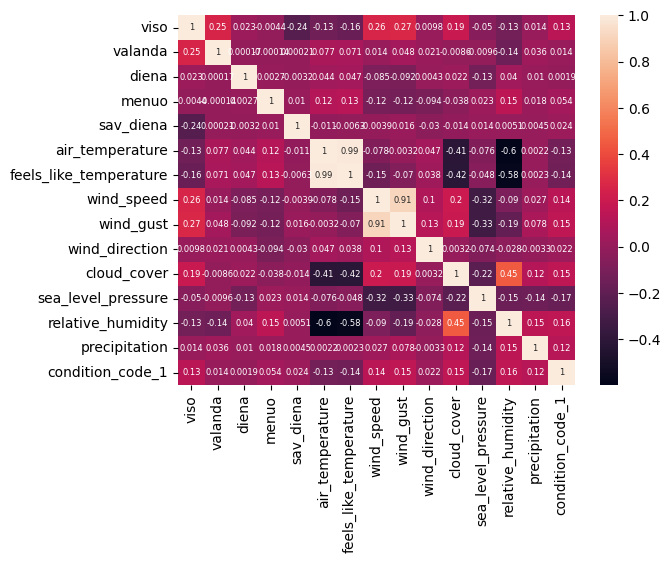

In [290]:
dt=df1.corr(numeric_only=True)
sns.heatmap(data=dt,annot=True, annot_kws={'fontsize':6})

In [291]:
Xmok= df1.drop(columns=['dateTime', 'viso'])
y=df1['viso']
xpred = df1_1031.drop(columns=['dateTime', 'viso'])
X_train, X_test, y_train, y_test = train_test_split(Xmok, y, test_size=0.1, random_state=30)

fit = LinearRegression().fit(X_train, y_train)
pred = fit.predict(X_test)
fit.score(X_test, y_test)*100.0
pred = fit.predict(xpred)
df1_1031['Linear'] = pred

In [292]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
# Make predictions
y_pred = rf.predict(X_test)
# Evaluate accuracy
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f'Mean Absolute Percentage Error: {mape}%')
pred = rf.predict(xpred)
df1_1031['RandomForest']=pred

Mean Absolute Percentage Error: 4.473209388875396%


In [293]:
dt_regressor = DecisionTreeRegressor(random_state=35)
dt_regressor.fit(X_train, y_train)
y_pred = dt_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
# print(f"R-squared: {r2}")
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f'Mean Absolute Percentage Error: {mape}%')
pred = dt_regressor.predict(xpred)
df1_1031['DecisionTree']= pred

Mean Squared Error: 2795.3656176225754
Mean Absolute Percentage Error: 5.626861985419246%


In [294]:
svr = SVR(kernel='linear')  
svr.fit(X_train, y_train)  
pred = svr.predict(xpred)
df1_1031['SVRlinear']= pred

In [295]:
svr = SVR(kernel='poly')  
svr.fit(X_train, y_train)  
pred = svr.predict(xpred)
df1_1031['SVRpoly']= pred

In [296]:
svr = SVR(kernel='rbf')  
svr.fit(X_train, y_train)  
pred = svr.predict(xpred)
df1_1031['SVRrbf']= pred

In [297]:
df14=df1_1031

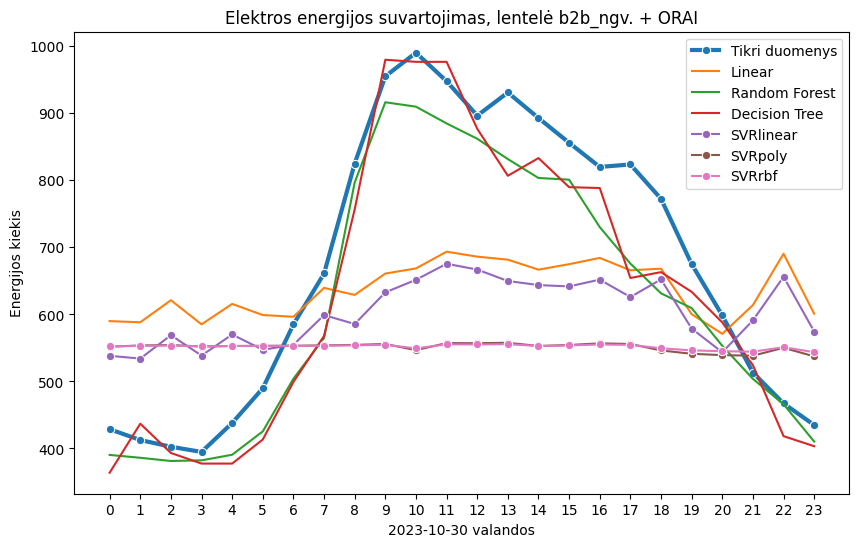

In [298]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=df1_1031, x='valanda', y='viso', label='Tikri duomenys', marker='o', linewidth=3)
sns.lineplot(data=df1_1031, x='valanda', y='Linear', label='Linear')
sns.lineplot(data=df1_1031, x='valanda', y='RandomForest', label='Random Forest')
sns.lineplot(data=df1_1031, x='valanda', y='DecisionTree', label='Decision Tree')
sns.lineplot(data=df1_1031, x='valanda', y='SVRlinear', label='SVRlinear', marker='o')
sns.lineplot(data=df1_1031, x='valanda', y='SVRpoly', label='SVRpoly', marker='o')
sns.lineplot(data=df1_1031, x='valanda', y='SVRrbf', label='SVRrbf', marker='o')
plt.title('Elektros energijos suvartojimas, lentelė b2b_ngv. + ORAI')
plt.ylabel('Energijos kiekis')
plt.xlabel('2023-10-30 valandos')
plt.xticks(ticks=df1_1031['valanda'], labels=df1_1031['valanda'])
# plt.xticks(rotation=0)
plt.show()

In [299]:
df_bendra = pd.merge(df11, df12, on='valanda', suffixes=('1', '2'))
df_laikina = pd.merge(df13, df14, on='valanda', suffixes=('3', '4'))
df_bendra = pd.merge(df_bendra, df_laikina, on='valanda')

In [300]:
df_bendra.head()

,dateTime1,viso1,valanda,diena1,menuo1,sav_diena1,air_temperature1,feels_like_temperature1,wind_speed1,wind_gust1,...,sea_level_pressure4,relative_humidity4,precipitation4,condition_code_14,Linear4,RandomForest4,DecisionTree4,SVRlinear4,SVRpoly4,SVRrbf4
0,2023-10-30 00:00:00,745.340335,0,30,10,0,7.0,7.0,3.6,6.0,...,1004.6,99.0,0.0,15.0,589.986526,390.373509,363.818033,538.222448,551.921583,552.164166
1,2023-10-30 01:00:00,683.211501,1,30,10,0,7.4,7.4,3.3,5.8,...,1004.3,98.0,0.1,8.0,588.214808,386.096368,436.951835,534.076501,553.611643,553.088085
2,2023-10-30 02:00:00,637.173832,2,30,10,0,7.9,7.9,3.4,5.8,...,1003.5,99.0,1.6,15.0,621.157845,381.347126,393.253072,568.981434,554.248032,553.509422
3,2023-10-30 03:00:00,627.920467,3,30,10,0,8.4,8.4,3.2,6.3,...,1003.0,99.0,0.3,8.0,585.135288,382.276317,377.462667,538.582231,552.099176,552.294423
4,2023-10-30 04:00:00,626.576100,4,30,10,0,8.7,8.7,3.9,6.8,...,1002.7,99.0,0.1,15.0,615.627690,390.642600,377.462667,570.023978,552.857535,552.780216


In [301]:
df_bendra['viso'] = df_bendra['viso1'] + df_bendra['viso2'] + df_bendra['viso3'] + df_bendra['viso4']
df_bendra['Linear'] = df_bendra['Linear1'] + df_bendra['Linear2'] + df_bendra['Linear3'] + df_bendra['Linear4']
df_bendra['RandomForest'] = df_bendra['RandomForest1'] + df_bendra['RandomForest2'] + df_bendra['RandomForest3'] + df_bendra['RandomForest4']
df_bendra['DecisionTree'] = df_bendra['DecisionTree1'] + df_bendra['DecisionTree2'] + df_bendra['DecisionTree3'] + df_bendra['DecisionTree4']
df_bendra['SVRlinear'] = df_bendra['SVRlinear1'] + df_bendra['SVRlinear2'] + df_bendra['SVRlinear3'] + df_bendra['SVRlinear4']
df_bendra['SVRpoly'] = df_bendra['SVRpoly1'] + df_bendra['SVRpoly2'] + df_bendra['SVRpoly3'] + df_bendra['SVRpoly4']
df_bendra['SVRrbf'] = df_bendra['SVRrbf1'] + df_bendra['SVRrbf2'] + df_bendra['SVRrbf3'] + df_bendra['SVRrbf4']

In [302]:
df_bendra = df_bendra[['valanda', 'viso', 'Linear', 'RandomForest', 'DecisionTree', 'SVRlinear', 'SVRpoly', 'SVRrbf']]

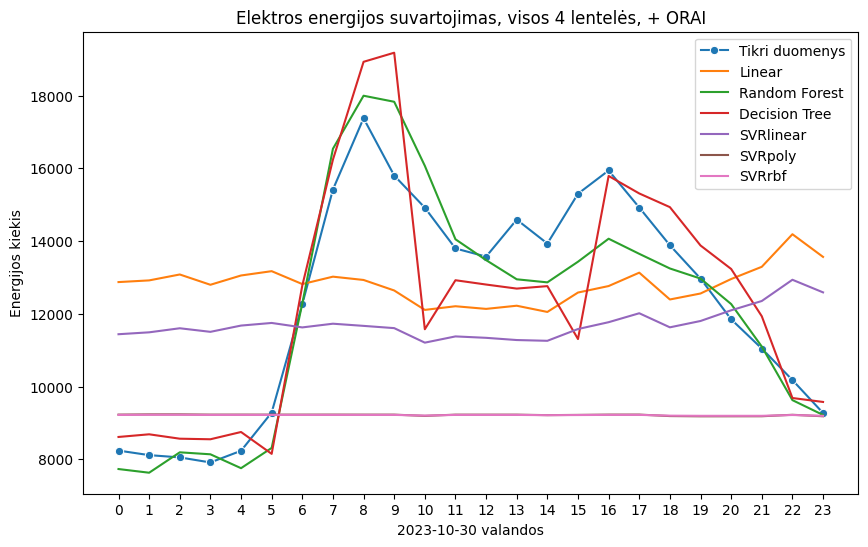

In [303]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=df_bendra, x='valanda', y='viso', label='Tikri duomenys', marker='o')
sns.lineplot(data=df_bendra, x='valanda', y='Linear', label='Linear')
sns.lineplot(data=df_bendra, x='valanda', y='RandomForest', label='Random Forest')
sns.lineplot(data=df_bendra, x='valanda', y='DecisionTree', label='Decision Tree')
sns.lineplot(data=df_bendra, x='valanda', y='SVRlinear', label='SVRlinear')
sns.lineplot(data=df_bendra, x='valanda', y='SVRpoly', label='SVRpoly')
sns.lineplot(data=df_bendra, x='valanda', y='SVRrbf', label='SVRrbf')
plt.title('Elektros energijos suvartojimas, visos 4 lentelės, + ORAI')
plt.ylabel('Energijos kiekis')
plt.xlabel('2023-10-30 valandos')
plt.xticks(ticks=df_bendra['valanda'], labels=df_bendra['valanda'])
# plt.xticks(rotation=0)
plt.show()

In [304]:
asd=df_bendra['viso'].sum()
print(asd)

296916.5740329999
